# Notebook 1.

In [5]:
import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,MALE
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,FEMALE
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,FEMALE


In [6]:
penguins = penguins[['flipper_length_mm', 'body_mass_g']]
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flipper_length_mm  342 non-null    float64
 1   body_mass_g        342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [7]:
penguins.dropna(inplace=True)
penguins = penguins.reset_index(drop=True)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flipper_length_mm  342 non-null    float64
 1   body_mass_g        342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


Text(0.5, 1.0, 'Body Mass as a function of the Flipper Length')

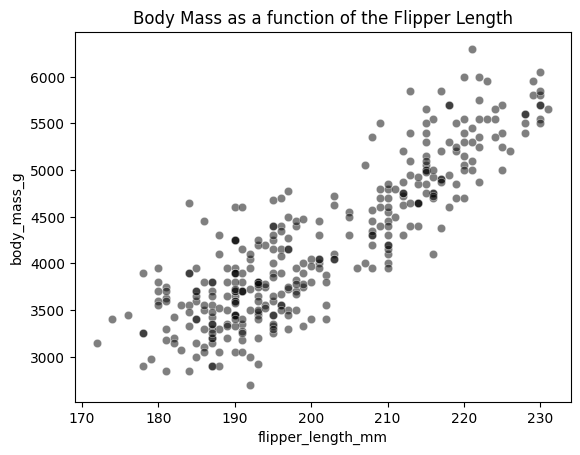

In [8]:
import seaborn as sns

feature_name = "flipper_length_mm"
target_name = "body_mass_g"
data, target = penguins[[feature_name]], penguins[target_name]

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.set_title("Body Mass as a function of the Flipper Length")

In [9]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

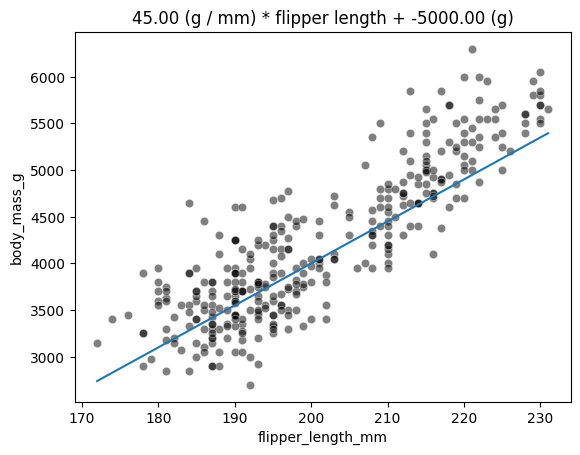

In [10]:
import numpy as np

weight_flipper_length = 45
intercept_body_mass = -5000

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

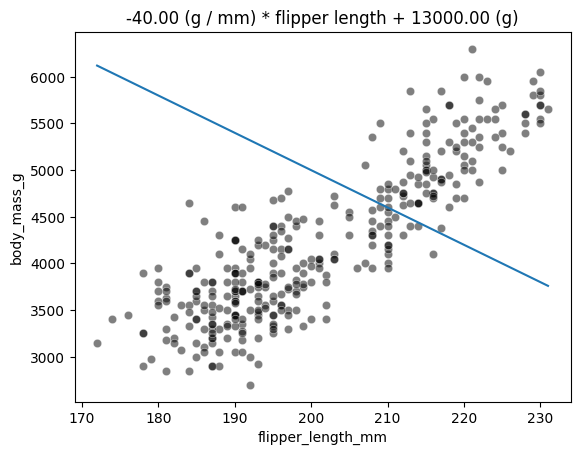

In [11]:
weight_flipper_length = -40
intercept_body_mass = 13000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

# Notebook 2.